#Анализ временных рядов (по материалам ВШЦК ИТМО)

Анализ временных рядов позволяет изучить показатели во времени. Временной ряд — это числовые значения статистического показателя, расположенные в хронологическом порядке.

## Составляющие временного ряда



**Тренд** - плавное, долгосрочное изменение уровня ряда \\
**Сезонность** - циклические изменения уровня ряда с постоянным периодом (например, ежемесячному потреблению электроэнергии соответствует период в 12 месяцев) \\
**Цикл** - изменение уровня ряда с переменным периодом (например, экономические циклы, периоды солнечной активности 5-7 лет и т.п) \\
**Шум** - непрогнозируемая, случайная компонента ряда

##Прогнозирование временного ряда



Под прогнозированием ряда понимается построение (моделирование) такой функции f, \\
которая на основе значений временного ряда $y_{1}, y_{2}, ... y_{t}$ \\
и дополнительного параметра $h$ выдает прогнозное значение ряда для точек $(t+h)$ \\
$f(y_{1}, y_{2}, ... y_{t}, h) = \hat{y}_{t+h} ,$ \\
где параметр $h$ - это значение в интервале от $1$ до $H$, где $H$ - горизонт планирования

##Модели временного ряда




Модели временного ряда делятся на аддитивные, мультипликативные и смешанные \
Пусть $u_{t}$ - трендовая составляющая \
$s_{t}$ - сезонная составляющая \
$e_{t}$ - случайная составляющая \

**Аддитивная модель** \\
$y_{t} = u_{t}+s_{t}+e_{t} $

**Мультипликативная модель** \\
$y_{t} = u_{t}*s_{t}*e_{t} $

## Метрики

**Метрика** - функция для определения расстояния между двумя элементами множества

**Ошибка прогноза в момент времени $t$** - это разность между
предсказанным и
реальным значением переменной в момент времени $t$. \
$e_{t} = \hat{y}_{t} - y_{t}, $ \
где $\hat{y}_{t}$ - предсказанное значение, $y_{t}$ - реальное значение переменной

## Метрики качества

MAE (mean absolute error - средняя абсолютная ошибка)

$MAE = \frac{\sum_{t=1}^{n} |у|_{t}}{n} $


MSE (mean squared error - среднеквадратическая ошибка)

$MSE = \frac{\sum_{t=1}^{n} {e^2}_{t}}{n} $

MAPE (mean absolute percentage error - средняя абсолютная процентная ошибка)


$MAPE= 100 \% *\frac{\sum_{t=1}^{n} |{ \frac{e_{t}}{y_{t}} |}}{n} $

## Метод скользящего среднего (Simple moving average)

### SMA offline

In [102]:
 # import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/DPO/quiz_5_2_2_data.csv',   header=None)

#view the dataset
data.head()

,0,1
0,1,34
1,2,32
2,3,37
3,4,33
4,5,38


In [104]:
data.columns

Int64Index([0, 1], dtype='int64')

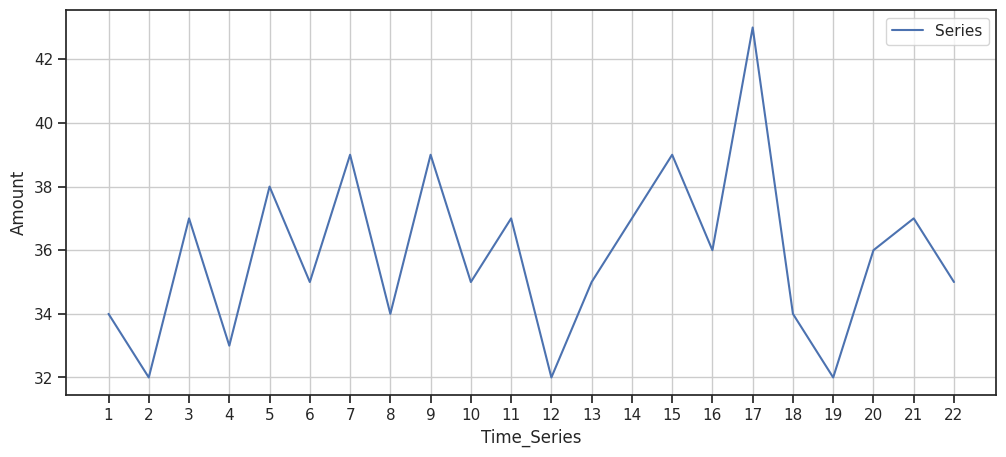

In [105]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.set(style="ticks")
sns.lineplot( x = data[0],
             y = data[1],
             label = 'Series')

plt.xlabel( 'Time_Series')

# setting customized ticklabels for x axis
pos = data[0]
lab = data[0]

plt.xticks( pos, lab)
plt.ylabel('Amount')
plt.grid()
plt.show()

Для вычислений сглаженных значений методом SMA offline используется формула $s_i = \frac{1}{2k+1} \sum_{j=-k}^{k} y_{i+j}$, \\
где $y_{i}$ - значение исходного ряда, $s_{i}$ - значение сглаженного ряда, $2k+1$ - ширина окна

Вычислим сглаженное значение, соответствующее пятому элементу исходного ряда в случае метода SMA offline с шириной окна = 3. Сначала найдем $k$ из соотношения \\
$ 3 = 2k+1 $ \\
Откуда $ k = 1 $ \\

тогда  $s_2 = \frac{1}{3} \sum_{j=-1}^{1} y_{2+j} = \frac{y_{1}+y_{2}+y_{3}}{3} = \frac{34+32+37}{3} \approx 34.33 $,

тогда  $s_5 = \frac{1}{3} \sum_{j=-1}^{1} y_{5+j} = \frac{y_{4}+y_{5}+y_{6}}{3} = \frac{33+38+35}{3} \approx 35.33 $,

shift(periods=-(len_window//2)) - означает сдвиг

In [106]:
len_window = 3

In [107]:
data[f'{len_window}day_rolling_avg_offline'] = data[1].rolling(len_window).mean().shift(periods=-(len_window//2))

In [108]:
len_window = 7

In [109]:
data[f'{len_window}day_rolling_avg_offline'] = data[1].rolling(len_window ).mean().shift(periods=-(len_window//2))

In [110]:
data

,0,1,3day_rolling_avg_offline,7day_rolling_avg_offline
0,1,34,NaN,NaN
1,2,32,34.333333,NaN
2,3,37,34.000000,NaN
3,4,33,36.000000,35.428571
4,5,38,35.333333,35.428571
5,6,35,37.333333,36.428571
6,7,39,36.000000,36.142857
7,8,34,37.333333,36.714286
8,9,39,36.000000,35.857143
9,10,35,37.000000,35.857143


Вычислите скользящее среднее с помощью pandas.DataFrame.rolling.mean().

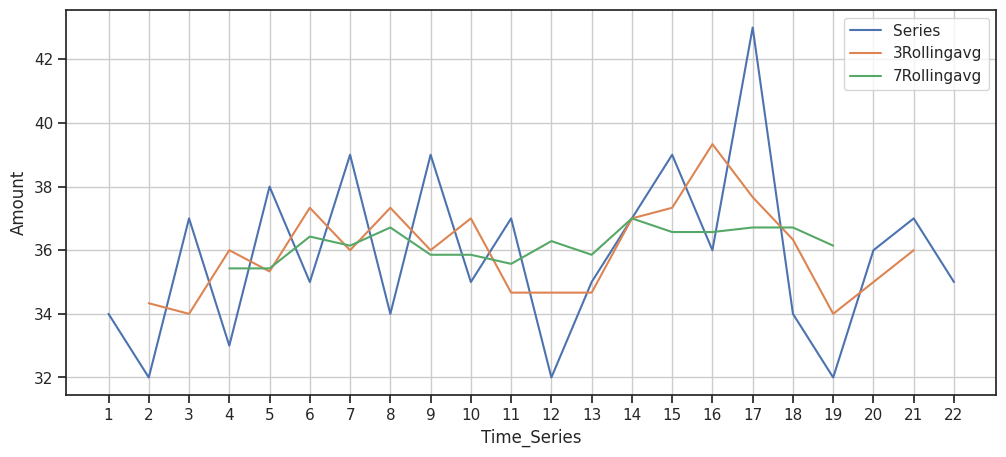

In [111]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.set(style="ticks")
sns.lineplot( x = data[0],
             y = data[1],
             label = 'Series')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['3day_rolling_avg_offline'] ,
			label = '3Rollingavg')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['7day_rolling_avg_offline'] ,
			label = '7Rollingavg')

# setting customized ticklabels for x axis
pos = data[0]
lab = data[0]

plt.xticks( pos, lab)
plt.xlabel( 'Time_Series')
plt.ylabel('Amount')
plt.grid()
plt.show()


### SMA online

Для вычислений сглаженных значений методом SMA online используется формула $s_i = \frac{1}{n+1} \sum_{j=-n}^{0} y_{i+j}$, \\
где $y_{i}$ - значение исходного ряда, $s_{i}$ - значение сглаженного ряда, $n+1$ - ширина окна

Вычислим сглаженное значение, соответствующее пятому элементу исходного ряда в случае метода SMA online с шириной окна = 3. Сначала найдем $k$ из соотношения \\
$ 3 = n +1 $ \\
Откуда $ n = 2 $ \\

тогда  $s_5 = \frac{1}{3} \sum_{j=-2}^{0} y_{5+j} = \frac{y_{3}+y_{4}+y_{5}}{3} = \frac{34+32+37}{3} \approx 36 $,

shift() не используется

In [99]:
len_window = 3
data[f'{len_window}day_rolling_avg_online'] = data[1].rolling(len_window).mean()

In [100]:
data

,0,1,3day_rolling_avg_offline,7day_rolling_avg_offline,3day_rolling_avg_online
0,1,34,NaN,NaN,NaN
1,2,32,34.333333,NaN,NaN
2,3,37,34.000000,NaN,34.333333
3,4,33,36.000000,35.428571,34.000000
4,5,38,35.333333,35.428571,36.000000
5,6,35,37.333333,36.428571,35.333333
6,7,39,36.000000,36.142857,37.333333
7,8,34,37.333333,36.714286,36.000000
8,9,39,36.000000,35.857143,37.333333
9,10,35,37.000000,35.857143,36.000000


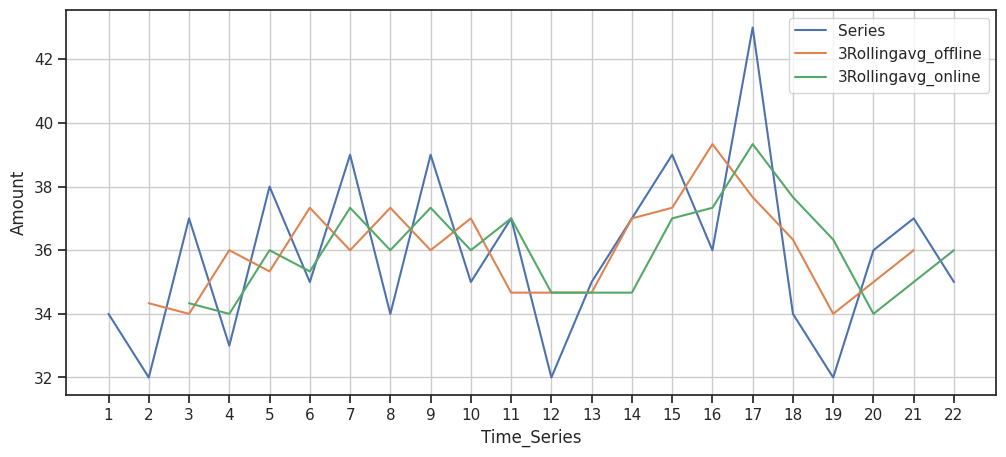

In [101]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.set(style="ticks")
sns.lineplot( x = data[0],
             y = data[1],
             label = 'Series')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['3day_rolling_avg_offline'] ,
			label = '3Rollingavg_offline')

# plot using rolling average
sns.lineplot( x = data[0],
			y = data['3day_rolling_avg_online'] ,
			label = '3Rollingavg_online')

# setting customized ticklabels for x axis
pos = data[0]
lab = data[0]

plt.xticks( pos, lab)
plt.xlabel( 'Time_Series')
plt.ylabel('Amount')
plt.grid()
plt.show()

## Метод экспоненциального сглаживания (EMA)

$s_{t} = \alpha * y_{t} + (1- \alpha) * s_{t-1}, t > 1, 0 \leq \alpha  \leq 1$ \
$ s_{1} = y_{1}, t = 1 $

$y_{t} $ - значение исходного ряда \
$s_{t} $ - значение сглаженного ряда \
$\alpha$ - коэффициент сглаживания

$s_{t} = \alpha  y_{t} + \alpha (1- \alpha) y_{t-1} + \alpha {(1- \alpha)^2} y_{t-2} +   \alpha {(1- \alpha)^3} y_{t-3} + ... +  \alpha {(1- \alpha)^{t-1}} y_{1} $

In [112]:
# import the dataset
data = pd.read_csv('/content/drive/MyDrive/DPO/quiz_5_2_3_data.csv',   header=None)

#view the dataset
data.head()

,0,1
0,1,34
1,2,32
2,3,37
3,4,33
4,5,38


In [140]:
y = [i for i in data[1]]

In [181]:
print(*y)

34 32 37 33 38 35 39 34 37 35 37 34 35 37 39 36 39 34 35 36 37 35


In [182]:
## Start with the first point
forcast = [y[0]]
alpha = .1

for i in range(1, len(y)):
    predict = alpha * y[i - 1] + (1 - alpha) * forcast[i - 1]
    forcast.append(predict)

In [184]:
print(*forcast)

34 34.0 33.800000000000004 34.120000000000005 34.008 34.4072 34.466480000000004 34.91983200000001 34.827848800000005 35.045063920000004 35.04055752800001 35.23650177520001 35.11285159768001 35.10156643791201 35.29140979412081 35.66226881470873 35.69604193323786 36.02643773991407 35.82379396592267 35.7414145693304 35.76727311239736 35.89054580115763


In [115]:
data[1]

0     34
1     32
2     37
3     33
4     38
5     35
6     39
7     34
8     37
9     35
10    37
11    34
12    35
13    37
14    39
15    36
16    39
17    34
18    35
19    36
20    37
21    35
Name: 1, dtype: int64

In [124]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import plotly.express as px

In [126]:
ses = SimpleExpSmoothing(data[1])

In [165]:
alpha = 0.1

In [166]:
model = ses.fit(smoothing_level = alpha, optimized = False)

In [167]:
predicted_values = ses.fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

In [168]:
data[f'predicted_values{alpha}'] = predicted_values

In [169]:
data

,0,1,predicted_values0.1,predicted_values0.3
0,1,34,34.000000,34.000000
1,2,32,33.800000,33.400000
2,3,37,34.120000,34.480000
3,4,33,34.008000,34.036000
4,5,38,34.407200,35.225200
5,6,35,34.466480,35.157640
6,7,39,34.919832,36.310348
7,8,34,34.827849,35.617244
8,9,37,35.045064,36.032071
9,10,35,35.040558,35.722449


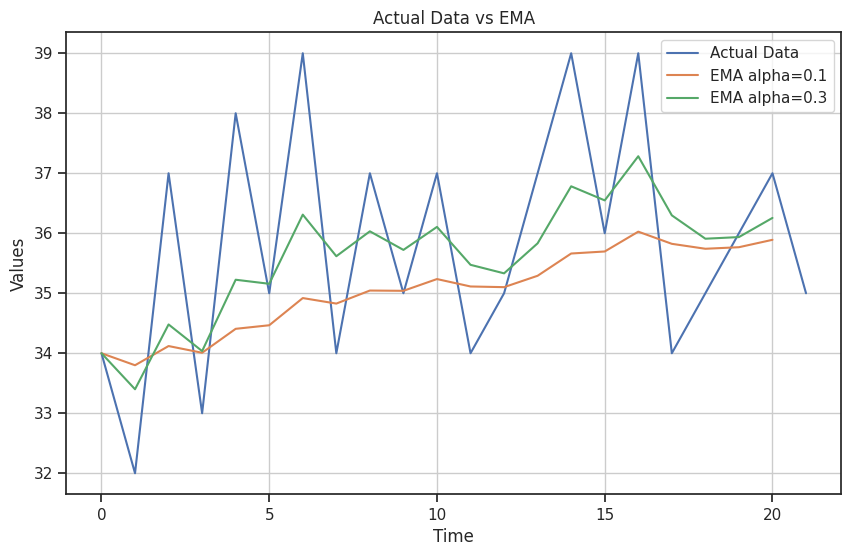

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(data[1], label='Actual Data')
plt.plot(data['predicted_values0.1'], label='EMA alpha=0.1')
plt.plot(data['predicted_values0.3'], label='EMA alpha=0.3')
plt.legend()
plt.title('Actual Data vs EMA')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid()
plt.show()

In [178]:
forecast = model.forecast(1)

In [179]:
forecast

22    35.801491
dtype: float64

## Тренды

Линейный, полиномиальный, экспоненциальный, логарифмический

Аналитические функции для определения тренда \
Линейная $f(x) = a+bx $ \
Полиномиальная $f(x) = a + b_{1}x + b_{2}{x^2} + b_{k}{x^k} $ \
Экспоненциальная $f(x) = c{e^{a+bx}}$ \
Логарифмическая $f(x) = a*log_{b}x+c $

##Коэффициент детерминации

${R^2} = 1 - \frac {\sum_{i=1}^{n} {(y_{i}-f_{i}})^2}{{\sum_{i=1}^{n} {(y_{i}-y_{avg}})^2}}$

$y_{i}$ - значения временного ряда в момент времени i \
$f_{i}$ - значения тренда в момент времени i \
$y_{avg}$ - среднее значение элементов временного ряда